In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
import seaborn as sns 
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [3]:
df=pd.read_csv('indian_liver_patient.csv')
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [4]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [5]:
df['Albumin_and_Globulin_Ratio'].describe()

count    579.000000
mean       0.947064
std        0.319592
min        0.300000
25%        0.700000
50%        0.930000
75%        1.100000
max        2.800000
Name: Albumin_and_Globulin_Ratio, dtype: float64

In [6]:
df['Albumin_and_Globulin_Ratio']=df['Albumin_and_Globulin_Ratio'].fillna(round(df['Albumin_and_Globulin_Ratio'].mean(),2))

In [7]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

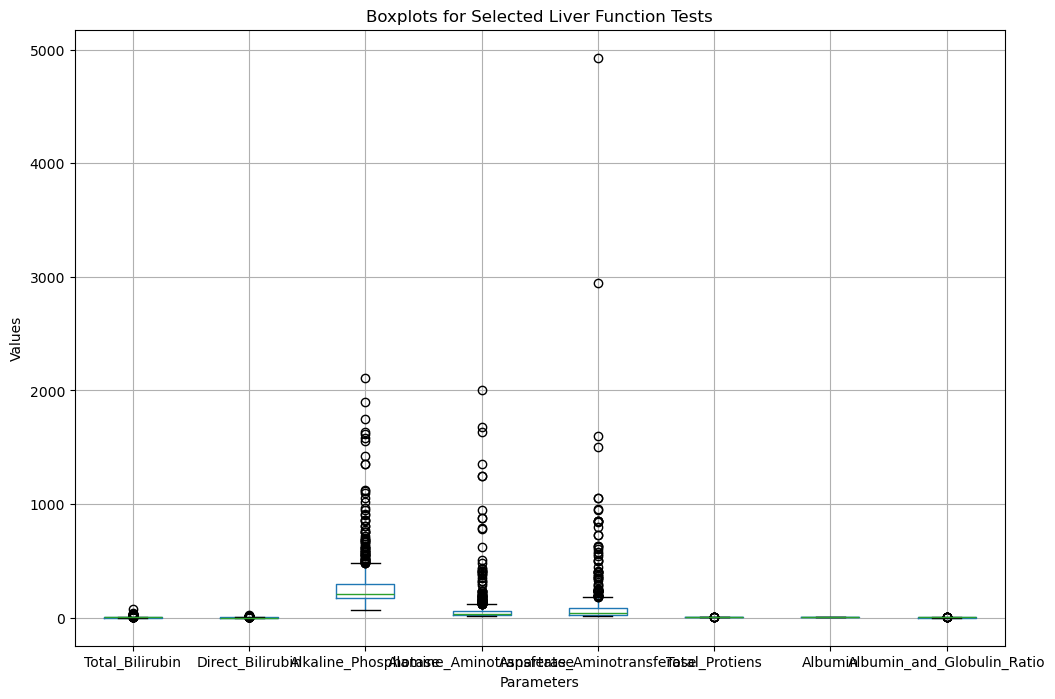

In [8]:
## Using boxplot

columns_to_analyze = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
                      'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
                      'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']

df[columns_to_analyze].boxplot(figsize=(12,8))
plt.title('Boxplots for Selected Liver Function Tests')
plt.xlabel('Parameters')
plt.ylabel('Values')
plt.show()

In [9]:
ideal_ranges = {
    'Total_Bilirubin': (0.1, 1.2),
    'Direct_Bilirubin': (0, 0.3),
    'Alkaline_Phosphotase': (44, 147),
    'Alamine_Aminotransferase': (7, 56),
    'Aspartate_Aminotransferase': (10, 40),
    'Total_Protiens': (6.3, 7.9),
    'Albumin': (3.5, 5.0),
    'Albumin_and_Globulin_Ratio': (1.0, 2.1)
}

# Get the summary statistics using describe()
summary_stats = df.describe()

# Extract the minimum and maximum values from the summary
min_max_stats = summary_stats.loc[['min', 'max']]

# Compare min/max with ideal ranges
comparison_result = {}
for column in ideal_ranges.keys():
    min_value = min_max_stats.loc['min', column]
    max_value = min_max_stats.loc['max', column]
    lower_bound, upper_bound = ideal_ranges[column]

    comparison_result[column] = {
        'Min_Within_Range': lower_bound <= min_value <= upper_bound,
        'Max_Within_Range': lower_bound <= max_value <= upper_bound,
        'Min_Value': min_value,
        'Max_Value': max_value
    }

# Convert result to a DataFrame for easier viewing
comparison_df = pd.DataFrame(comparison_result).T

comparison_df

,Min_Within_Range,Max_Within_Range,Min_Value,Max_Value
Total_Bilirubin,True,False,0.4,75.0
Direct_Bilirubin,True,False,0.1,19.7
Alkaline_Phosphotase,True,False,63.0,2110.0
Alamine_Aminotransferase,True,False,10.0,2000.0
Aspartate_Aminotransferase,True,False,10.0,4929.0
Total_Protiens,False,False,2.7,9.6
Albumin,False,False,0.9,5.5
Albumin_and_Globulin_Ratio,False,False,0.3,2.8


In [15]:
# len(df[df['Total_Bilirubin']>25]) = 9

# len(df[df['Direct_Bilirubin']>15]) = 3

# len(df[df['Alkaline_Phosphotase']>1000]) = 15

# len(df[df['Alamine_Aminotransferase']>500]) = 13

# len(df[df['Aspartate_Aminotransferase']>1000]) = 24

In [16]:
df2 = df[
    (df['Total_Bilirubin'] <= 25) &
    (df['Direct_Bilirubin'] <= 15) &
    (df['Alkaline_Phosphotase'] <= 1000) &
    (df['Alamine_Aminotransferase'] <= 500) &
    (df['Aspartate_Aminotransferase'] <= 1000)
]
df2

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [17]:
df3=df2.copy()
gender_l=LabelEncoder()
df3['Gender']=gender_l.fit_transform(df2['Gender'])

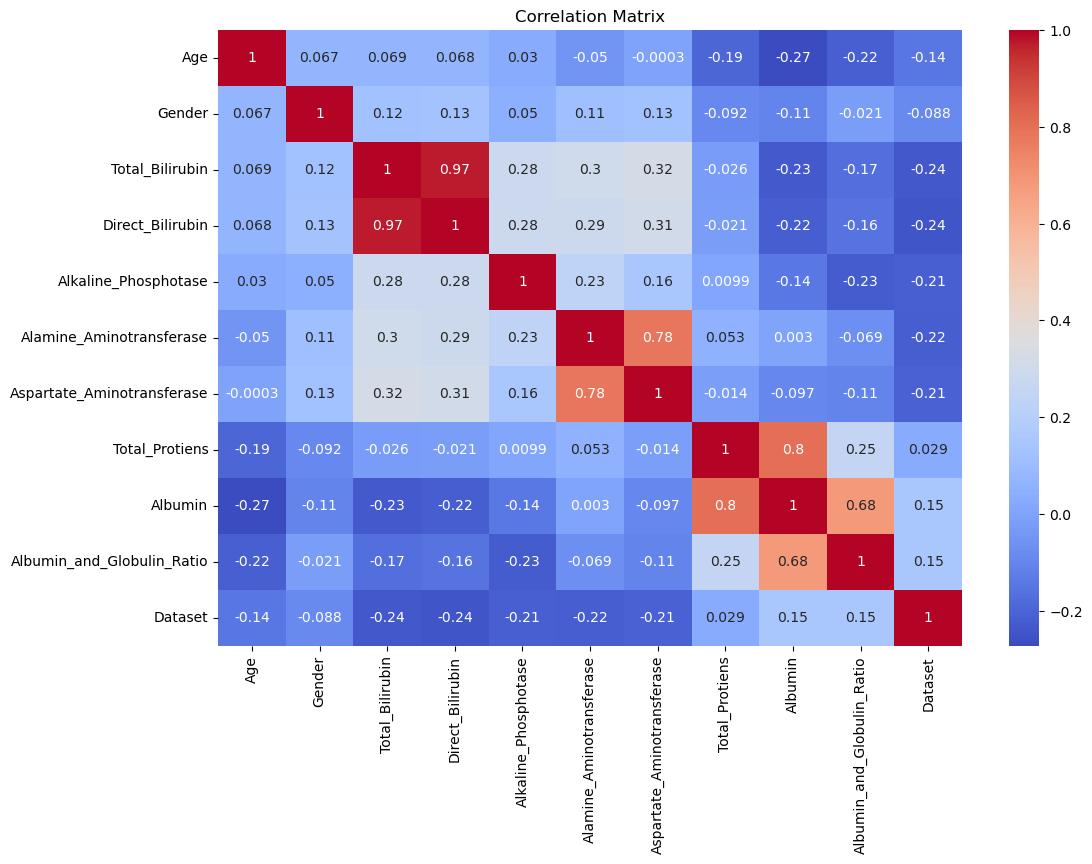

In [18]:
# Compute the correlation matrix

corr_matrix = df3.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
# lets drop direct bilirubin

df3.drop('Direct_Bilirubin',axis=1,inplace=True)

In [20]:
df3['Dataset']=df3['Dataset'].apply(lambda x: 0 if x == 1  else 1)

In [21]:
df3

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,195,27,59,7.3,2.4,0.40,0
...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,500,20,34,5.9,1.6,0.37,1
579,40,1,0.6,98,35,31,6.0,3.2,1.10,0
580,52,1,0.8,245,48,49,6.4,3.2,1.00,0
581,31,1,1.3,184,29,32,6.8,3.4,1.00,0


In [22]:
x = df3.drop(['Dataset'], axis=1)  # Features
y = df3['Dataset']  # Target variable

# Split the dataset into train and test sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features (important for SVM and Logistic Regression)
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [23]:
# Model definitions with hyperparameters for GridSearchCV
models = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10]
        }
    },
    'SVC': {
        'model': SVC(),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto']
        }
    }
}

In [24]:
best_models = {}
for model_name, config in models.items():
    print(f"Training {model_name}...")
    clf = GridSearchCV(config['model'], config['params'], cv=5, scoring='accuracy', n_jobs=-1)
    clf.fit(x_train_scaled, y_train)
    best_models[model_name] = clf.best_estimator_
    print(f"Best parameters for {model_name}: {clf.best_params_}")
    print(f"Training accuracy: {clf.best_score_:.4f}")

# Evaluate the models on the test set
for model_name, model in best_models.items():
    print(f"\nEvaluating {model_name} on test data...")
    y_pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(x_test_scaled)[:, 1]) if hasattr(model, "predict_proba") else None
    print(f"Test accuracy: {accuracy:.4f}")
    if roc_auc:
        print(f"ROC AUC Score: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))

# Compare models and find the best one
best_model_name = max(best_models, key=lambda model_name: accuracy_score(y_test, best_models[model_name].predict(x_test)))
print(f"\nBest model: {best_model_name}")

Training LogisticRegression...
Best parameters for LogisticRegression: {'C': 0.01, 'solver': 'liblinear'}
Training accuracy: 0.6743
Training RandomForest...
Best parameters for RandomForest: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}
Training accuracy: 0.6949
Training SVC...
Best parameters for SVC: {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Training accuracy: 0.6743

Evaluating LogisticRegression on test data...
Test accuracy: 0.7909
ROC AUC Score: 0.6677
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        87
           1       0.00      0.00      0.00        23

    accuracy                           0.79       110
   macro avg       0.40      0.50      0.44       110
weighted avg       0.63      0.79      0.70       110


Evaluating RandomForest on test data...
Test accuracy: 0.7636
ROC AUC Score: 0.7371
              precision    recall  f1-score   support

           0       0.84      0.87      0.85    

C:\Users\kawle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kawle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kawle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kawle\anaconda3\Lib\site-packag

In [25]:
x_scaled=scaler.fit_transform(x)
model=LogisticRegression()
model.fit(x_scaled,y)

importance=model.coef_[0]

feature_importance=pd.DataFrame({
    'Features' : x.columns,
    'Importance' : importance
})

feature_importance=feature_importance.sort_values(by='Importance',ascending=False)

feature_importance

,Features,Importance
7,Albumin,0.913419
8,Albumin_and_Globulin_Ratio,0.558262
1,Gender,-0.189993
6,Total_Protiens,-0.670755
0,Age,-1.219896
5,Aspartate_Aminotransferase,-1.501370
3,Alkaline_Phosphotase,-1.653177
4,Alamine_Aminotransferase,-2.027593
2,Total_Bilirubin,-2.325657


In [26]:
model.fit(x_train_scaled,y_train)
model.score(x_test_scaled,y_test)

0.7818181818181819